# Zadání

#### Monitoring odezvy pingu (20b)
Produkt: jupyter notebook (příp. skript), který posílá pingy na vhodně vybraný server. Stanovíte si rozumnou mez round-trip-time (RTT) pro odpověď, kdy bude považována za úspěch (X=1), pokud pong překročí tuto mez nebo nedorazí vůbec, počítáte neúspěch (X=0). Cílem je sekvenčně modelovat pravděpodobnost úspěšné odezvy p(X=1). Skript by měl obsahovat parametr, který určí, kolik pingů se pošle jednorázově. Při jednom modelujete Bernoulliho rozdělením, při více pingách binomickým. Apriorno je beta. Vykresluje se vývoj bodového odhadu pravděpodobnosti +/- 3 směrodatné odchylky (odmocniny z variance).

# Řešení

## Knihovny

In [50]:
import requests
import pandas as pd
import matplotlib as plt

## Ping

count    30.000000
mean     10.822833
std       0.449934
min      10.194000
25%      10.422000
50%      10.677000
75%      11.255250
max      11.579000
dtype: float64

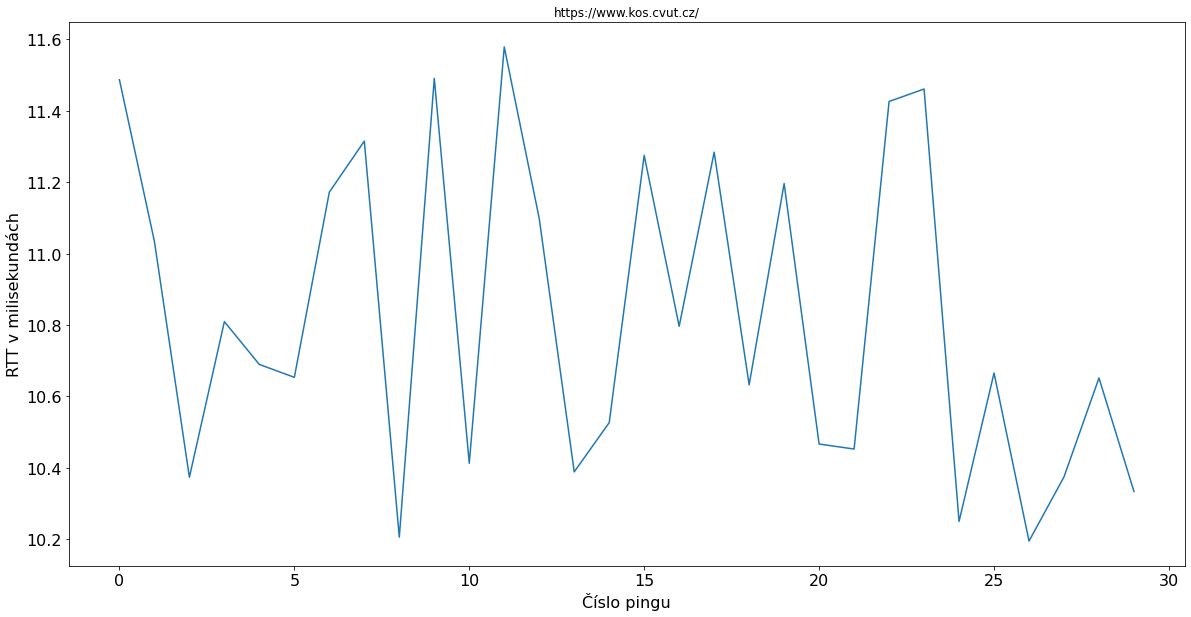

In [64]:
def ping_time(n, url):
    """Perform n pings to url and return their RTT in ms as iterable"""
    rtt = list()
    session = requests.Session()
    for i in range(n):
        r = session.get(url)
        time = r.elapsed.total_seconds()
        rtt.append(time)
    return map(lambda x: 1000*x, rtt) # seconds to milliseconds

url = 'https://www.kos.cvut.cz/'
n = 30

rtt = ping_time(n, url)
df = pd.Series(rtt)

ax = df.plot(figsize=(20,10), title=url, fontsize=16);
ax.set_xlabel('Číslo pingu', fontsize=16)
ax.set_ylabel('RTT v milisekundách', fontsize=16)
df.describe()

## Sekvenční modelace pravděpodobnosti úspěchu odezvy